# Wave Equation

This notebook uses a C++ program to solve the wave equation
$$
\partial_t u - \partial_{x} u = 0
$$
and then visualizes the results

## Test and Visualize Results

#### Load various modules and set defaults

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['animation.html'] = 'html5'

#### Run the test

In [2]:
!cd build && ./test_derivative

#### Plot the test results

The left plot shows the original function (sine), as well as the calculated derivative, which should be cosine.

In [3]:
df = pd.read_csv("build/f-0.csv", names=("x", "u", "rhs"))
df

,x,u,rhs
0,0.000000,0.000000e+00,9.744950e-01
1,0.392699,3.826830e-01,9.003160e-01
2,0.785398,7.071070e-01,6.890720e-01
3,1.178100,9.238800e-01,3.729230e-01
4,1.570800,1.000000e+00,0.000000e+00
5,1.963500,9.238800e-01,-3.729230e-01
6,2.356190,7.071070e-01,-6.890720e-01
7,2.748890,3.826830e-01,-9.003160e-01
8,3.141590,1.224650e-16,-9.744950e-01
9,3.534290,-3.826830e-01,-9.003160e-01


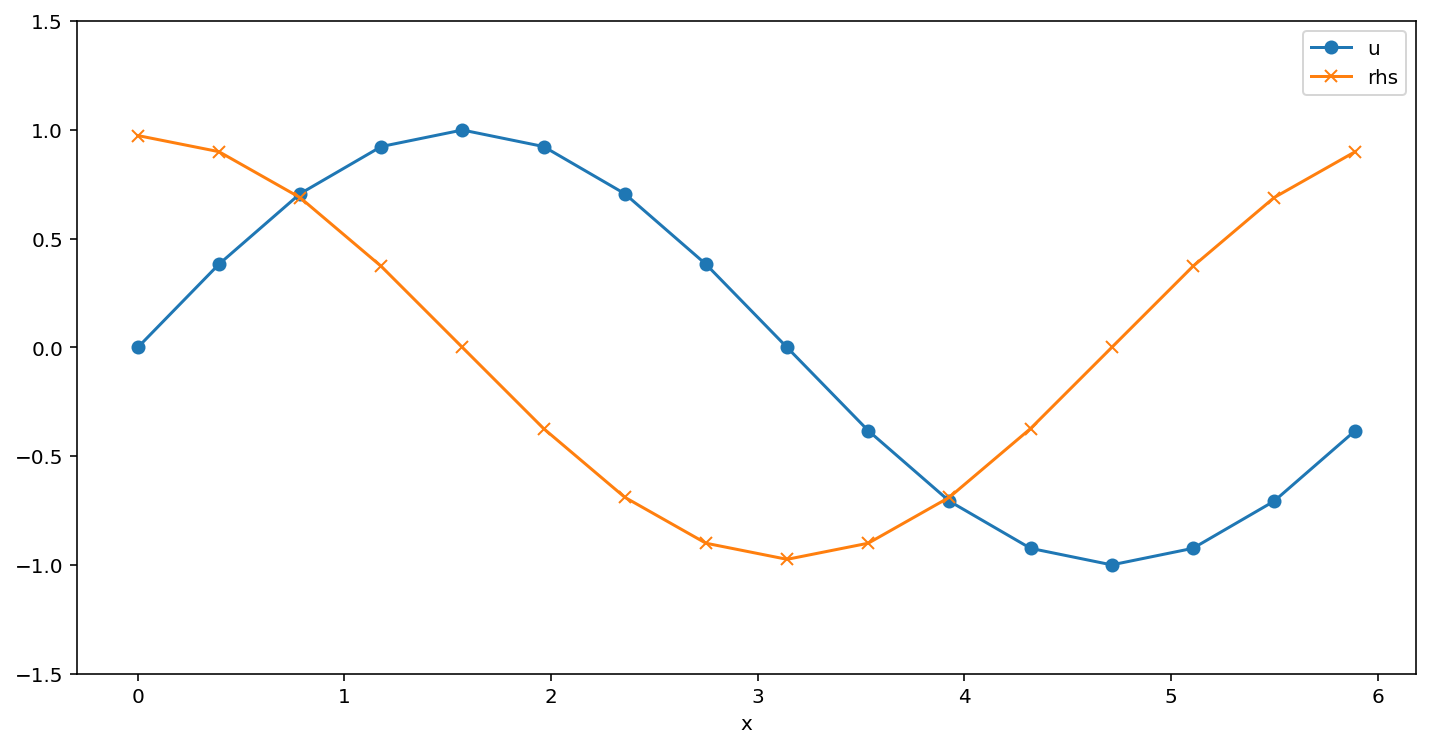

In [4]:
ax = df.plot(x="x", y="u", label="u", style='-o')
df.plot(x="x", y="rhs", label="rhs", style='x-', ylim=(-1.5, 1.5), ax=ax);

#### Run the wave equation solver

In [5]:
!cd build && ./wave_equation

#### Plot the initial condition

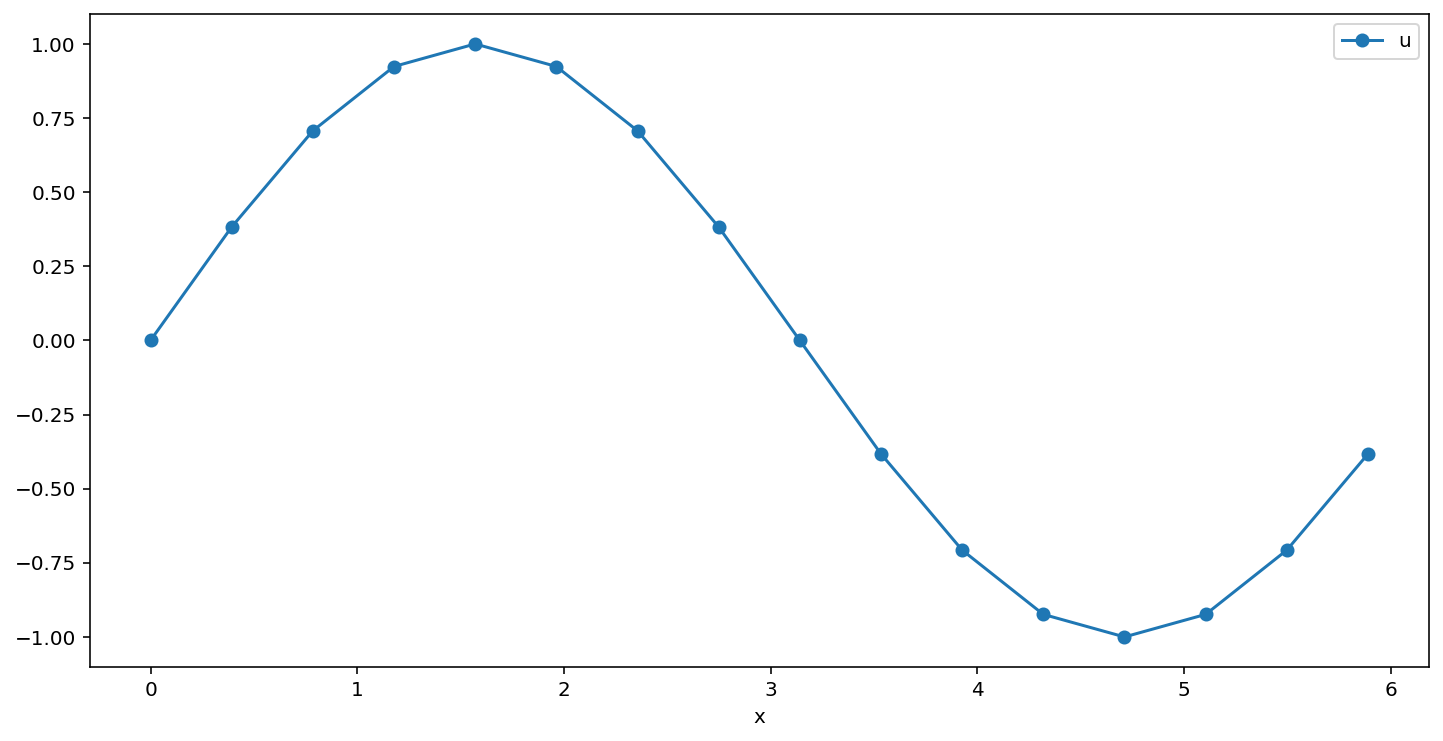

In [6]:
df = pd.read_csv("build/u-0-0.csv", names=("x", "u"))
df.plot(x="x", y="u", style="o-");

In [7]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.5, 1.5)

line, = ax.plot([], [], lw=2)
plt.close()

In [8]:
def init():
    #line.set_data([], [])
    return (line,)

def animate(i):
    df = pd.read_csv("build/u-{}-0.csv".format(i), names=("x", "u"))
    line.set_data(df["x"], df["u"])
    return (line,)

#### Show an animation of the time evolution of the solution

In [9]:
animation.FuncAnimation(fig, animate, init_func=init,
                        frames=20, interval=200, blit=True)

In [10]:
!cd build && mpirun -n 2 ./test_derivative

In [11]:
n_ranks = 2
df = pd.concat([pd.read_csv("build/f-{}.csv".format(r), names=("x", "u", "rhs")) for r in range(n_ranks)])

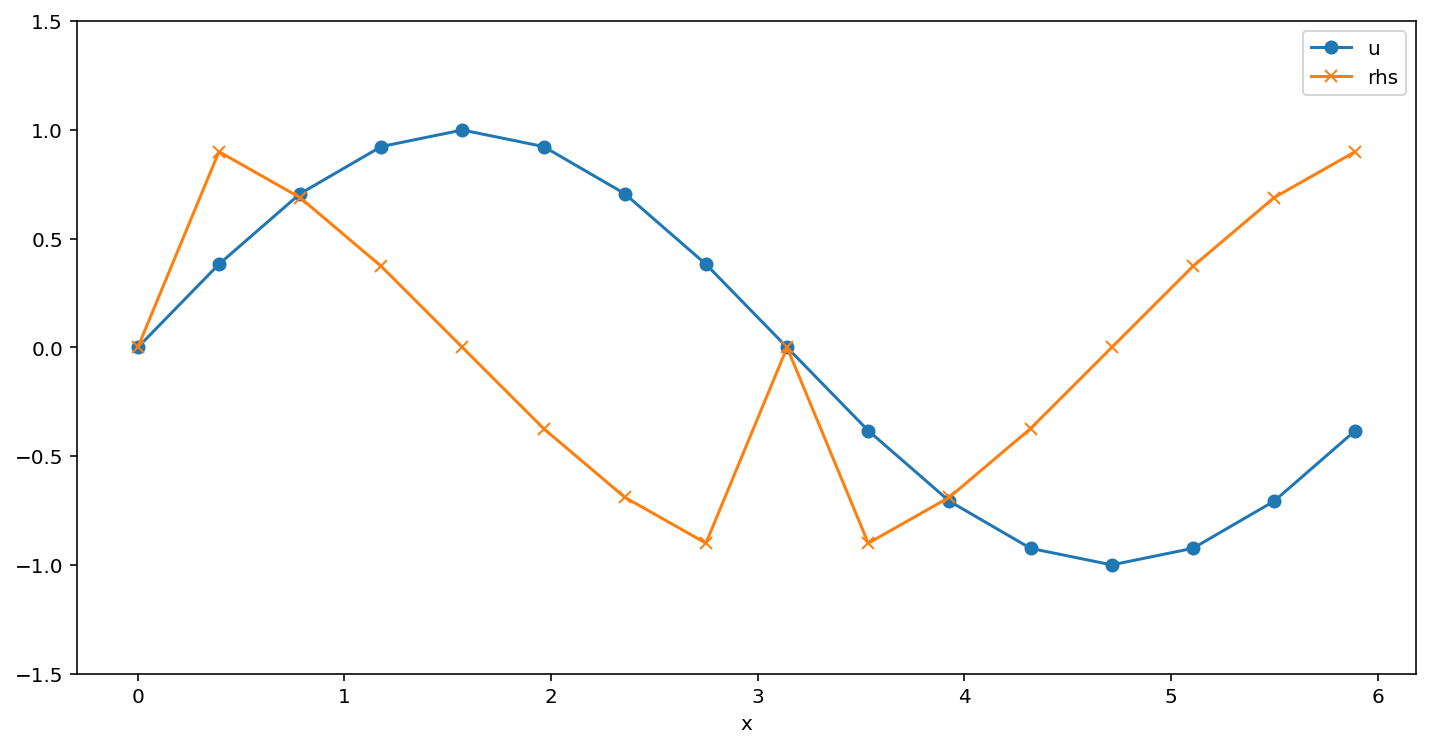

In [12]:
ax = df.plot(x="x", y="u", label="u", style='-o')
df.plot(x="x", y="rhs", label="rhs", style='x-', ylim=(-1.5, 1.5), ax=ax);